## Observations and Insights 

1. Based on Summary Statistics table, it can be observed that Ramicane regimen has the lowest mean and median values of the tumor volumen as well as the lowest values for variance, standard deviation and SEM. On the other hand, Capomulin, the drug of interest, come up in second place about these metrics, just slightly higher than Ramicane results.

2. The bar chart shows that the population of mice was equally distributed between the ten different regimens, except for the Stelasyn drug, where only twenty four of twenty five mice were treated.

3. The pie chart demostrates that the distribution of female versus male mice it is almost equally distributed. Male mice represent the 50.2% of the total population.

4. The box plot highlights the final tumor volume across four regimens of interest. Capomulin and Ramicane concentrates the mice population with the lowest values of volume of tumor versus Infubinol and Ceftamin. Moreover, Ramicane has the lowest values for minimun, maximun, median and quartile 1.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset, all data required
data_merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
data_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Identify incomplete rows
data_merged.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
data_merged["Mouse ID"].value_counts()

g989    13
c264    10
b742    10
a262    10
a699    10
        ..
l872     1
f932     1
d133     1
x336     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = data_merged[data_merged.duplicated(["Mouse ID", "Timepoint"])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its index.
data_merged.drop([909, 911, 913, 915, 917], inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
data_merged["Mouse ID"].value_counts()

c264    10
x822    10
a262    10
a699    10
t718    10
        ..
l872     1
f932     1
d133     1
x336     1
n482     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
# Checking final total rows
data_merged.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# summary_statistics = data_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std"])
summary_statistics = data_merged.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, sem])
summary_statistics


/Users/cintiaolivamercadomastach/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/cintiaolivamercadomastach/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/cintiaolivamercadomastach/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

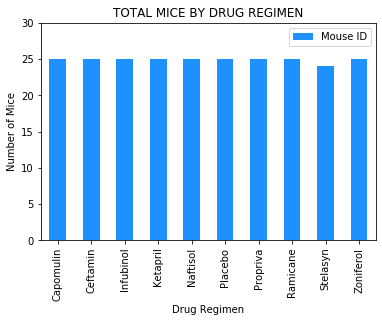

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.

# Group series for total number of mice for each treatment
mice_count = data_merged.groupby(["Drug Regimen"]).agg({"Mouse ID": "nunique"})

# Create a bar chart based off of the group series from before
mice_count_bar = mice_count.plot(kind='bar', title="TOTAL MICE BY DRUG REGIMEN", color="dodgerblue",
                                 xlim =(-0.75, len(mice_count)-0.25), ylim =(0, max(mice_count["Mouse ID"])+5))

# Set the xlabel and ylabel using class methods
mice_count_bar.set_xlabel("Drug Regimen")
mice_count_bar.set_ylabel("Number of Mice")

# Print chart to screen
plt.show()


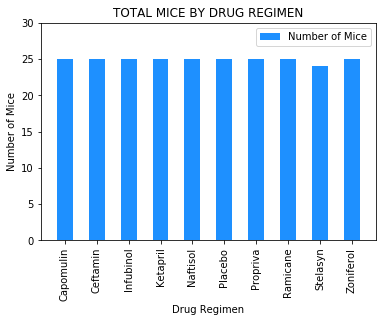

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# List for x axis
x_axis = np.arange(len(mice_count.index))

# Bar chart based upon above lists
plt.bar(x_axis, mice_count["Mouse ID"], color='dodgerblue', align="center", width=0.5,label="Number of Mice")

# Place x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_count.index, rotation="vertical")

# Sets the x,y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_count["Mouse ID"])+5)

# Set legend
plt.legend(loc="best")

# Give the chart a title, x label, and y label
plt.title("TOTAL MICE BY DRUG REGIMEN")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Print chart to screen
plt.show()

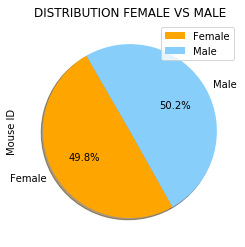

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group series for total number of female and male mice
mice_count_sex = mouse_metadata.groupby(["Sex"])["Mouse ID"].count()

# Create a pie chart based off of the group series from before
mice_count_pie = mice_count_sex.plot(kind='pie', title="DISTRIBUTION FEMALE VS MALE", legend=True, shadow=True,
                                     startangle=120, autopct='%1.1f%%', colors=["orange", "lightskyblue"])

# Print chart to screen
plt.show()


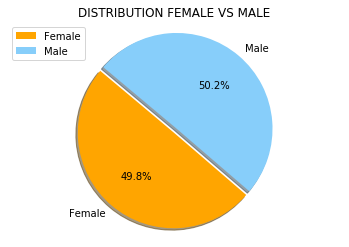

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group series for total number of female and male mice
mice_count_sex = mouse_metadata.groupby(["Sex"])["Mouse ID"].count().to_frame("count")

# Labels for sections of pie chart
labels = mice_count_sex.index

# The values of each section of the pie chart
sizes = mice_count_sex["count"]

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

# Tells matplotlib to separate section from the others
explode = (0,0.05)

# Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Give the chart a title
plt.title("DISTRIBUTION FEMALE VS MALE")

# Set legend
plt.legend(loc="best")

# Print chart to screen
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Selection data of the four treatment regimens
data_filtered = data_merged[(data_merged["Drug Regimen"] == "Capomulin") | 
                            (data_merged["Drug Regimen"] == "Ramicane") |
                            (data_merged["Drug Regimen"] == "Infubinol") |
                            (data_merged["Drug Regimen"] == "Ceftamin")]

# Get the greatest timepoint by mouse
data_grp = data_filtered.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = pd.DataFrame({"Timepoint": data_grp})                              

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol = last_timepoint.merge(data_merged, on=["Mouse ID", "Timepoint"])
last_tumor_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for n in range(len(treatments_reg)):
    tumor_vol.append(last_tumor_vol["Tumor Volume (mm3)"][last_tumor_vol["Drug Regimen"] == treatments_reg[n]])

# Determine outliers using upper and lower bounds
for n in range(len(tumor_vol)):
    quartiles = tumor_vol[n].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    for i in range(len(tumor_vol[n])):
        if (tumor_vol[n].iloc[i] < lower_bound) | (tumor_vol[n].iloc[i] > upper_bound):
            outliers.append(tumor_vol[n].iloc[i])

print(f"Potencial outliers: {outliers}")

Potencial outliers: [36.321345799999996]


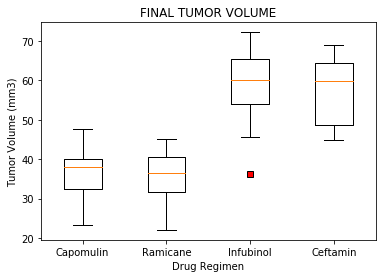

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Define color and style for any potential outliers
red_square = dict(markerfacecolor='r', marker='s')

# Give the chart a title, x label, and y label
fig1, ax1 = plt.subplots()
ax1.set_title('FINAL TUMOR VOLUME')
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Tumor Volume (mm3)')

# Generate a box plot
ax1.boxplot(tumor_vol, flierprops=red_square)

# Place x axis headers
x_axis = np.arange(len(treatments_reg))+1
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, treatments_reg)

# Print chart to screen
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Selected mouse: ID y793, chosen from previous dataframe last_tumor_vol
y793_data = data_merged[(data_merged["Mouse ID"] == "y793")]
y793_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2
124,y793,Capomulin,Male,17,17,45,31.896238,2


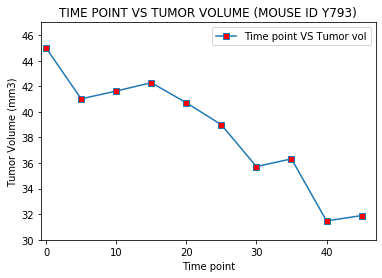

In [19]:
x_axis = np.arange(0,50,5)

# Plot the line
plt.plot(x_axis, y793_data["Tumor Volume (mm3)"], label="Time point VS Tumor vol", markerfacecolor='r', marker='s')

# Give the chart a title, x label, and y label
plt.title("TIME POINT VS TUMOR VOLUME (MOUSE ID Y793)")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")

# Sets the x,y limits
plt.xlim(-0.75, max(y793_data["Timepoint"])+2)
plt.ylim(30, max(y793_data["Tumor Volume (mm3)"])+2)

# Set legend
plt.legend(loc="best")

# Print chart to screen
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


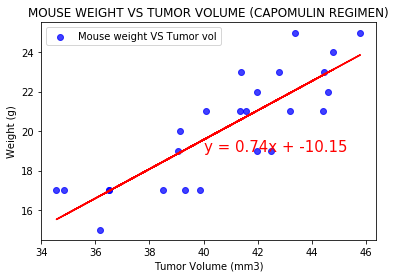

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Select Capomulin regimen data 
capomulin_data = data_merged[data_merged["Drug Regimen"] == "Capomulin"]

# Group serie for weight per mouse ID
cap_mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].max()

# Group serie for average tumor volume per Mouse ID
cap_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Create scatter plot based upon above values
plt.scatter(cap_tumor_volume, cap_mouse_weight, marker="o", facecolors="b", alpha=0.75, label ="Mouse weight VS Tumor vol")

# Give the chart a title, x label, and y label
plt.title("MOUSE WEIGHT VS TUMOR VOLUME (CAPOMULIN REGIMEN)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation
correlation = round(st.pearsonr(cap_tumor_volume, cap_mouse_weight)[0],2)
print(f"The correlation between both factors is {correlation}")

# Calculate linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_tumor_volume, cap_mouse_weight)
regress_values = cap_tumor_volume * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.plot(cap_tumor_volume,regress_values,"r-")
plt.annotate(line_eq,(40,19), fontsize=15,color="red")

# Set legend
plt.legend(loc="best")

# Print chart to screen
plt.show()
